In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(weather_api_key)

1d75023101ec17623ab7e495d5868fcd


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
print(lat_lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
len(cities)

630

In [3]:
city_df=pd.DataFrame({"City":cities})
city_df.head()

,City
0,mys shmidta
1,zhuhai
2,bredasdorp
3,sondrio
4,attawapiskat


In [4]:

city_df["Lat"]=""
city_df["Lng"]=""
city_df["Max Temp"]=""
city_df["Humidity"]=""
city_df["Cloudiness"]=""
city_df["Wind Speed"]=""
city_df["Country"]=""
city_df["Date"]=""
city_df  

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mys shmidta,,,,,,,,
1,zhuhai,,,,,,,,
2,bredasdorp,,,,,,,,
3,sondrio,,,,,,,,
4,attawapiskat,,,,,,,,
...,...,...,...,...,...,...,...,...,...
625,kharan,,,,,,,,
626,vagur,,,,,,,,
627,tsihombe,,,,,,,,
628,ngukurr,,,,,,,,


In [8]:
params={"key":weather_api_key}
url_lat="http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url_lat}appid={weather_api_key}&units={units}&q="
print(query_url)
record=0
set_1=1
for index, row in city_df.iterrows():
    
    base_url="http://api.openweathermap.org/data/2.5/weather?"
    city=row["City"]
    params['address']=f"{city}"
    response = requests.get(query_url+city).json()
    try:
        city_df.loc[index,"Lat"]=response['coord']['lat']
        city_df.loc[index,"Lng"]=response['coord']['lon']
        city_df.loc[index,"Max Temp"]=response["main"]["temp_max"]
        city_df.loc[index,"Humidity"]=response['main']['humidity']
        city_df.loc[index,"Cloudiness"]=response['clouds']['all']
        city_df.loc[index,"Wind Speed"]=response['wind']['speed']
        city_df.loc[index,"Country"]=response['sys']['country']
        city_df.loc[index,"Date"]=response['dt']
        print(f"Processing Record {record} of Set{set_1} | {city}")
        record +=1
    except:
        print(f"{city} is not found. Skipping..")
    
    if record >=49:
        set_1 +=1
        record=1
      


http://api.openweathermap.org/data/2.5/weather?appid=1d75023101ec17623ab7e495d5868fcd&units=imperial&q=
mys shmidta is not found. Skipping..
Processing Record 0 of Set1 | zhuhai
Processing Record 1 of Set1 | bredasdorp
Processing Record 2 of Set1 | sondrio
attawapiskat is not found. Skipping..
Processing Record 3 of Set1 | kapaa
Processing Record 4 of Set1 | fortuna
gurgan is not found. Skipping..
Processing Record 5 of Set1 | ribeira grande
Processing Record 6 of Set1 | barrow
Processing Record 7 of Set1 | makaha
Processing Record 8 of Set1 | punta arenas
Processing Record 9 of Set1 | pisco
Processing Record 10 of Set1 | cape town
Processing Record 11 of Set1 | boende
nizhneyansk is not found. Skipping..
Processing Record 12 of Set1 | iqaluit
Processing Record 13 of Set1 | sabha
Processing Record 14 of Set1 | port alfred
louisbourg is not found. Skipping..
Processing Record 15 of Set1 | albany
Processing Record 16 of Set1 | chkalovskoye
Processing Record 17 of Set1 | mount isa
Process

bur gabo is not found. Skipping..
Processing Record 42 of Set4 | saint-pierre
Processing Record 43 of Set4 | yellowknife
Processing Record 44 of Set4 | qaanaaq
Processing Record 45 of Set4 | hasaki
Processing Record 46 of Set4 | sao joao da barra
Processing Record 47 of Set4 | san patricio
Processing Record 48 of Set4 | chuy
Processing Record 1 of Set5 | sao jose da coroa grande
Processing Record 2 of Set5 | namibe
babanusah is not found. Skipping..
Processing Record 3 of Set5 | pontianak
Processing Record 4 of Set5 | bitkine
Processing Record 5 of Set5 | ugoofaaru
Processing Record 6 of Set5 | thompson
Processing Record 7 of Set5 | mukhen
Processing Record 8 of Set5 | hambantota
Processing Record 9 of Set5 | manyana
Processing Record 10 of Set5 | bereznik
Processing Record 11 of Set5 | boo
Processing Record 12 of Set5 | boyolangu
Processing Record 13 of Set5 | kahului
Processing Record 14 of Set5 | tonota
amderma is not found. Skipping..
Processing Record 15 of Set5 | college
illoqqor

Processing Record 33 of Set8 | mindelo
Processing Record 34 of Set8 | hirado
Processing Record 35 of Set8 | virginia beach
tasbuget is not found. Skipping..
Processing Record 36 of Set8 | garagoa
Processing Record 37 of Set8 | xuanhua
Processing Record 38 of Set8 | komsomolskiy
Processing Record 39 of Set8 | hualmay
Processing Record 40 of Set8 | lata
Processing Record 41 of Set8 | kidal
Processing Record 42 of Set8 | piopio
Processing Record 43 of Set8 | kupang
Processing Record 44 of Set8 | road town
yuzhno-yeniseyskiy is not found. Skipping..
Processing Record 45 of Set8 | shenzhen
Processing Record 46 of Set8 | raudeberg
Processing Record 47 of Set8 | petrivka
Processing Record 48 of Set8 | jurm
felidhoo is not found. Skipping..
Processing Record 1 of Set9 | karratha
Processing Record 2 of Set9 | sulangan
Processing Record 3 of Set9 | whitehorse
Processing Record 4 of Set9 | palmas
Processing Record 5 of Set9 | tynda
Processing Record 6 of Set9 | kizner
Processing Record 7 of Set9 

Processing Record 29 of Set12 | tondi
Processing Record 30 of Set12 | qasigiannguit
Processing Record 31 of Set12 | thio
Processing Record 32 of Set12 | shibetsu
Processing Record 33 of Set12 | grado
Processing Record 34 of Set12 | waiuku
Processing Record 35 of Set12 | carballo
Processing Record 36 of Set12 | kharan
Processing Record 37 of Set12 | vagur
tsihombe is not found. Skipping..
ngukurr is not found. Skipping..
bolshoye polpino is not found. Skipping..


In [9]:
#replacing the empty string with NAN values and dropping those rows and getting the clean data
city_df=city_df.replace(r'^\s*$', np. nan, regex=True)
city_df=city_df.dropna()
city_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,zhuhai,22.28,113.57,89.01,65.0,3.0,5.82,CN,1.604216e+09
2,bredasdorp,-34.53,20.04,68.00,64.0,19.0,16.11,ZA,1.604216e+09
3,sondrio,46.17,9.87,55.00,92.0,0.0,1.12,IT,1.604216e+09
5,kapaa,22.08,-159.32,73.40,88.0,1.0,5.82,US,1.604216e+09
6,fortuna,40.60,-124.16,44.60,100.0,1.0,6.93,US,1.604216e+09
...,...,...,...,...,...,...,...,...,...
622,grado,43.39,-6.07,69.80,64.0,40.0,5.82,ES,1.604216e+09
623,waiuku,-37.25,174.75,63.00,67.0,94.0,11.41,NZ,1.604216e+09
624,carballo,43.21,-8.69,66.20,88.0,40.0,11.41,ES,1.604216e+09
625,kharan,28.58,65.42,75.36,14.0,0.0,3.15,PK,1.604216e+09


In [8]:
#export data into csv
city_df.to_csv("Output/file.csv", index=False, header=True)
#display the dataframe
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,18.272611,13.423996,57.127655,73.598579,50.024867,8.043925,1.604117e+09
std,33.863306,90.049082,21.898857,20.025485,40.633586,6.144559,1.202165e+02
min,-54.800000,-175.200000,-10.070000,10.000000,0.000000,0.160000,1.604117e+09
25%,-9.095000,-63.930000,44.400000,63.000000,1.000000,3.360000,1.604117e+09
50%,20.890000,14.080000,61.000000,79.000000,52.000000,6.460000,1.604117e+09
75%,46.800000,92.895000,75.200000,88.500000,90.000000,10.920000,1.604118e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,38.450000,1.604118e+09


In [11]:
#check if any humidity greater than 100
humidity=city_df.loc[city_df["Humidity"]>100]
humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


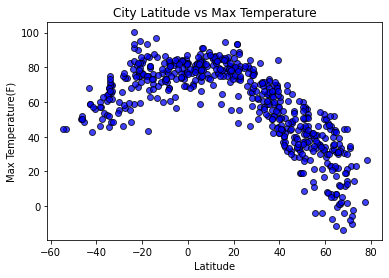

In [30]:
#plotting the data
#Lattitude vs Temperature Plot
lat= city_df["Lat"]
temp=city_df["Max Temp"]
plt.scatter(lat, temp,marker='o',facecolors='blue', edgecolor='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs Max Temperature")
plt.savefig("Output/City Latitude vs. Max Temperature.png")
plt.show()

# Notes:
#   The highest temperature is around 0 latitude which is closer to equator.
    

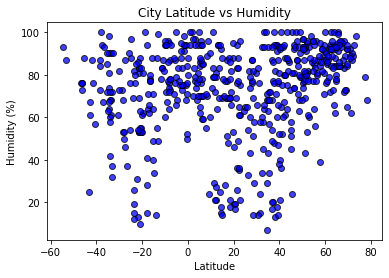

In [31]:
#Latitude vs Humidity Plot
lat= city_df["Lat"]
hum=city_df["Humidity"]
plt.scatter(lat,hum,marker='o',facecolors='blue', edgecolor='black', alpha=0.75)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Output/City Latitude vs. Humidity.png")
plt.show()

#Notes:
#Humidity is high on the lower latitude.

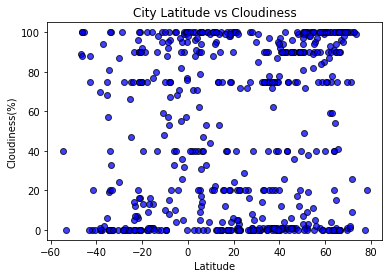

In [32]:
#Latitude vs Cloudiness Plot
lat= city_df["Lat"]
cloud=city_df["Cloudiness"]
plt.scatter(lat,cloud,marker='o',facecolors='blue', edgecolor='black', alpha=0.75)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("Output/City Latitude vs Cloudiness.png")
plt.show()
#Notes
#It is more cloudy if temp less than 0

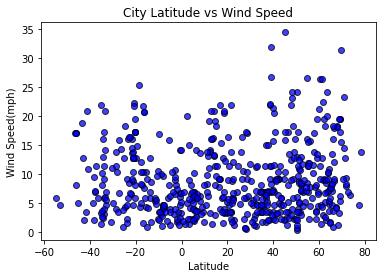

In [33]:
#Latitude vs Wind Speed Plot
lat= city_df["Lat"]
wind=city_df["Wind Speed"]
plt.scatter(lat,wind,marker='o',facecolors='blue', edgecolor='black', alpha=0.75)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.savefig("Output/City Latitude vs. Wind Speed.png")
plt.show()
#Notes
#the average wind speed 5mph on over all latitude.

In [1]:
#Linear Regression


The r-squared is: 0.74783237001492


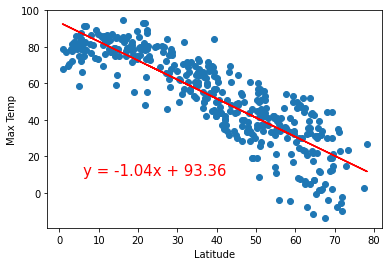

In [34]:
#Northern Hemisphere 
north_hem=city_df.loc[city_df["Lat"]>0]
lat_north=north_hem["Lat"]
tem_north=north_hem["Max Temp"]
hum_north=north_hem["Humidity"]
cloud_north=north_hem["Cloudiness"]

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = lat_north
y_values = tem_north
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()


The r-squared is: 0.3882841239222462


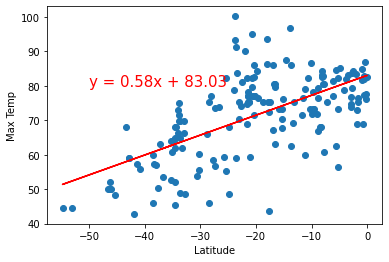

In [35]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
south_hem=city_df.loc[city_df["Lat"]<0]
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

The r-squared is: 0.08258660801535342


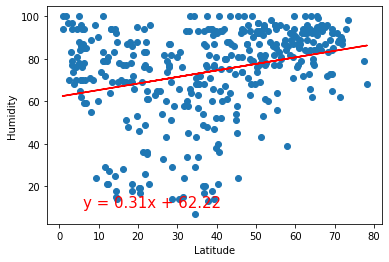

In [36]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = lat_north
y_values = hum_north
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

The r-squared is: 0.01699526823131999


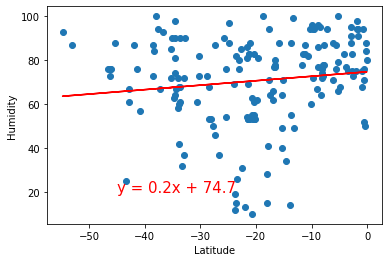

In [43]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
south_hem=city_df.loc[city_df["Lat"]<0]
x_values = south_hem["Lat"]
y_values = south_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/Southern Hemisphere -Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

The r-squared is: 0.01806726918367186


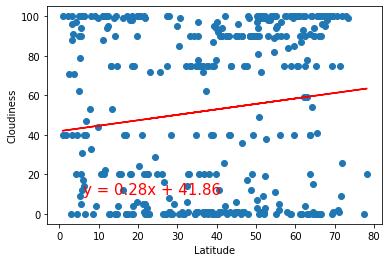

In [37]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = lat_north
y_values = cloud_north
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

The r-squared is: 0.05573935781788224


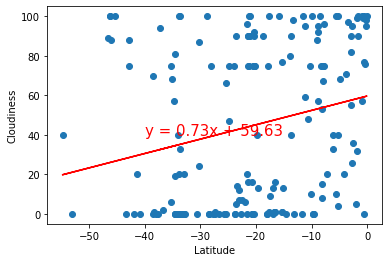

In [38]:
 #Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
south_hem=city_df.loc[city_df["Lat"]<0]
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

The r-squared is: 0.027739407345185953


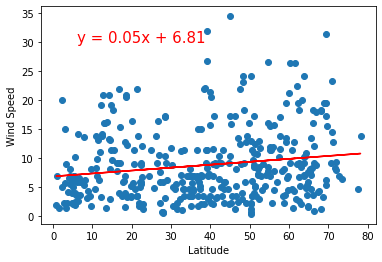

In [39]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
north_hem=city_df.loc[city_df["Lat"]>0]
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

The r-squared is: 0.04956497820189551


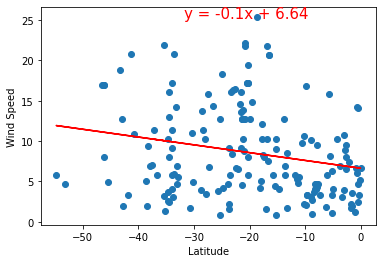

In [44]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
south_hem=city_df.loc[city_df["Lat"]<0]


x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-14,20),xytext=(0.8,0.95),textcoords='axes fraction',horizontalalignment='right',fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Output/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()